<a href="https://colab.research.google.com/github/JoshuaBarsky/Projects/blob/main/Chessboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [252]:
import numpy as np
from PIL import Image

In [255]:
def boardImage():
  pixels = np.random.randint(0,256,(721,721,3), dtype = np.uint8)

  for i in range(len(pixels)):
    for k in range(len(pixels)):
      pixels[i][k] = (230,230,230)
    for j in range(9):
      pixels[i][j*90] = (0,0,0)

  for i in range(9):
    for j in range(len(pixels)):
      pixels[i*90][j] = (0,0,0)

  return pixels

In [ ]:
def king():


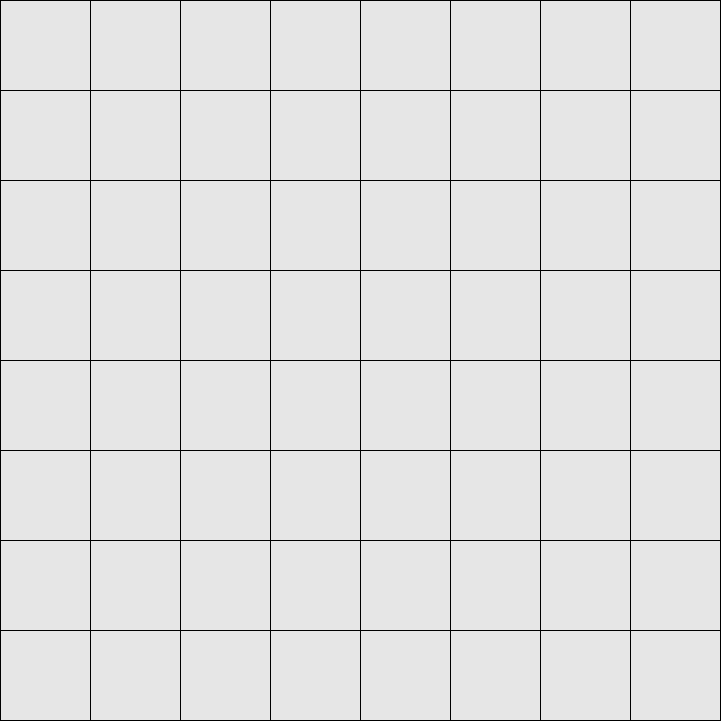

In [257]:
img = Image.fromarray(boardImage())
display(img)
img.save('dots.png')